# Going Deeper
  
Convolutional neural networks gain a lot of power when they are constructed with multiple layers (deep networks). In this chapter, you will learn how to stack multiple convolutional layers into a deep network. You will also learn how to keep track of the number of parameters, as the network grows, and how to control this number.


## Resources
  
**Notebook Syntax**
  
<span style='color:#7393B3'>NOTE:</span>  
- Denotes additional information deemed to be *contextually* important
- Colored in blue, HEX #7393B3
  
<span style='color:#E74C3C'>WARNING:</span>  
- Significant information that is *functionally* critical  
- Colored in red, HEX #E74C3C
  
---
  
**Links**
  
[NumPy Documentation](https://numpy.org/doc/stable/user/index.html#user)  
[Pandas Documentation](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)  
[Matplotlib Documentation](https://matplotlib.org/stable/index.html)  
[Seaborn Documentation](https://seaborn.pydata.org)  
[Scikit-image Documentation](https://scikit-image.org/docs/stable/)  
[Tensorflow Documentation](https://www.tensorflow.org)
  
---
  
**Notable Functions**
  
<table>
  <tr>
    <th>Index</th>
    <th>Operator</th>
    <th>Use</th>
  </tr>
  <tr>
    <td>1</td>
    <td>numpy.array</td>
    <td>A function from the NumPy library used to create arrays, which are fundamental data structures in numerical computing.</td>
  </tr>
  <tr>
    <td>2</td>
    <td>numpy.zeros</td>
    <td>A function from the NumPy library that creates an array filled with zeros.</td>
  </tr>
  <tr>
    <td>3</td>
    <td>tensorflow.keras.models.Sequential</td>
    <td>A class from the TensorFlow library that represents a linear stack of layers, which is the foundation for building neural network models.</td>
  </tr>
  <tr>
    <td>4</td>
    <td>tensorflow.keras.layers.Dense</td>
    <td>A class from TensorFlow that represents a fully connected (dense) layer in a neural network.</td>
  </tr>
  <tr>
    <td>5</td>
    <td>tensorflow.keras.layers.Conv2D</td>
    <td>A class from TensorFlow that represents a 2D convolutional layer used in convolutional neural networks (CNNs) for image processing tasks.</td>
  </tr>
  <tr>
    <td>6</td>
    <td>tensorflow.keras.layers.Flatten</td>
    <td>A class from TensorFlow that represents a layer used to flatten the input data before feeding it into a fully connected layer.</td>
  </tr>
  <tr>
    <td>7</td>
    <td>model.compile</td>
    <td>A method used to compile a Keras model by specifying loss, optimizer, and metrics.</td>
  </tr>
  <tr>
    <td>8</td>
    <td>tensorflow.keras.datasets.fashion_mnist.load_data</td>
    <td>A function from TensorFlow's Keras API to load the Fashion MNIST dataset.</td>
  </tr>
  <tr>
    <td>9</td>
    <td>pandas.get_dummies</td>
    <td>A function from the Pandas library to perform one-hot encoding on categorical data.</td>
  </tr>
  <tr>
    <td>10</td>
    <td>DataFrame.to_numpy</td>
    <td>A method to convert a Pandas DataFrame to a NumPy array.</td>
  </tr>
  <tr>
    <td>11</td>
    <td>model.fit</td>
    <td>A method to train a Keras model on a given dataset.</td>
  </tr>
  <tr>
    <td>12</td>
    <td>model.evaluate</td>
    <td>A method to evaluate the performance of a trained Keras model on a test dataset.</td>
  </tr>
  <tr>
    <td>13</td>
    <td>tensorflow.keras.layers.MaxPool2D</td>
    <td>Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension.</td>
  </tr>
</table>
  
---
  
**Language and Library Information**  
  
Python 3.11.0  
  
Name: numpy  
Version: 1.24.3  
Summary: Fundamental package for array computing in Python  
  
Name: pandas  
Version: 2.0.3  
Summary: Powerful data structures for data analysis, time series, and statistics  
  
Name: matplotlib  
Version: 3.7.2  
Summary: Python plotting package  
  
Name: seaborn  
Version: 0.12.2  
Summary: Statistical data visualization  
  
Name: scikit-image  
Version: 0.21.0  
Summary: Image processing in Python  
  
Name: tensorflow  
Version: 2.13.0  
Summary: TensorFlow is an open source machine learning framework for everyone.  
  
---
  
**Miscellaneous Notes**
  
<span style='color:#7393B3'>NOTE:</span>  
  
`python3.11 -m IPython` : Runs python3.11 interactive jupyter notebook in terminal.
  
`nohup ./relo_csv_D2S.sh > ./output/relo_csv_D2S.log &` : Runs csv data pipeline in headless log.  
  
`print(inspect.getsourcelines(test))` : Get self-defined function schema  
  
<span style='color:#7393B3'>NOTE:</span>  
  
Snippet to plot all built-in matplotlib styles :
  
```python

x = np.arange(-2, 8, .1)
y = 0.1 * x ** 3 - x ** 2 + 3 * x + 2
fig = plt.figure(dpi=100, figsize=(10, 20), tight_layout=True)
available = ['default'] + plt.style.available
for i, style in enumerate(available):
    with plt.style.context(style):
        ax = fig.add_subplot(10, 3, i + 1)
        ax.plot(x, y)
    ax.set_title(style)
```
  

In [1]:
import numpy as np                  # Numerical Python:         Arrays and linear algebra
import pandas as pd                 # Panel Datasets:           Dataset manipulation
import matplotlib.pyplot as plt     # MATLAB Plotting Library:  Visualizations
import seaborn as sns               # Seaborn:                  Visualizations
import tensorflow as tf             # TensorFlow:               Deep-Learning Neural Networks
from tensorflow import keras        # Keras:                    Tensorflow-Keras Integration


# Setting a standard figure size
plt.rcParams['figure.figsize'] = (8, 8)


2023-08-19 18:49:54.273531: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Going Deeper
  
One of the major strengths of convolutional neural networks comes from building networks with multiple layers of convolutional filters. This is why using artificial neural networks is sometimes also called "deep learning".
  
**Network with one convolutional layer**
  
This is the diagram that describes the network that we saw before. It has one convolutional layer, followed by a flattening and readout with a fully connected layer with 3 units.
  
<center><img src='../_images/networking-cnn-going-deeper.png' alt='img' width='500'></center>
  
**Network with one convolutional layer: implementation**
  
And here is the code that implements this network.
  
<center><img src='../_images/networking-cnn-going-deeper1.png' alt='img' width='500'></center>
  
**Building a deeper network**
  
In this diagram, we have added one more convolutional layer. This layer also has 10 feature maps. Instead of operating directly on the image, the convolutions in this layer operate on each of the feature maps in the first convolutional layer. After the second layer we again flatten the output of the convolutions and then pass on the flattened output to a 3-unit fully connected layer that then provides the output of the network. Let's see how we might implement this.
  
<center><img src='../_images/networking-cnn-going-deeper2.png' alt='img' width='500'></center>
  
**Building a deep network**
  
Here is the code for this network. First, we create the input layer. This is the same convolutional layer that we had in our previous network. Then, we add one more convolutional layer to the network. Because this layer receives its inputs from the first convolutional layer, it doesn't require the input_shape keyword argument to be provided. Finally, we flatten the output of the second layer and pass it to a Dense layer with softmax activation, to decide on the output.
  
<center><img src='../_images/networking-cnn-going-deeper3.png' alt='img' width='500'></center>
  
**Why do we want deep networks?**
  
Why do we want to add additional layers to a network? This is again motivated by our own visual system, which has multiple layers of processing in it. For example, this is the architecture of a network developed by Google researchers in 2014. It has 22 layers of convolutions, and some other kinds of layers, like pooling layers, that we will discuss in a subsequent lesson. For the time being, one way to understand why we would want a network this deep is by looking at the kinds of things that the kernels and feature maps in the different layers tend to respond to.
  
<center><img src='../_images/networking-cnn-going-deeper4.png' alt='img' width='500'></center>
  
**Features in early layers**
  
For example, these are the kinds of things that layers in the early part of the network tend to respond to. Oriented lines, or simple textures.
  
<center><img src='../_images/networking-cnn-going-deeper5.png' alt='img' width='500'></center>
  
**Features in intermediate layers**
  
Intermediate layers of the network tend to respond to more complex features, that include simple objects, such as eyes.
  
<center><img src='../_images/networking-cnn-going-deeper6.png' alt='img' width='500'></center>
  
**Features in late layers**
  
By the time the information travels up to higher layers of the network, the feature maps tend to extract specific types of objects. This allows the fully connected layers at the top of the network to extract useful information for object classification based on the responses of these layers. In other words, having multiple layers of convolutions in the network allows the network to gradually build up representations of objects in the images from simple features to more complex features and up to sensitivity to distinct categories of objects.
  
<center><img src='../_images/networking-cnn-going-deeper7.png' alt='img' width='500'></center>
  
**How deep?**
  
How deep should your network be? Consider the following: despite the advantages mentioned above, depth does come at a computational cost. In addition, to train a very deep network you might need a larger amount of training data.
  
- Depth comes at a computational cost
- May require more data


### Creating a deep learning network
  
A deep convolutional neural network is a network that has more than one layer. Each layer in a deep network receives its input from the preceding layer, with the very first layer receiving its input from the images used as training or test data.
  
Here, you will create a network that has two convolutional layers.
  
1. The first convolutional layer is the input layer of the network. This should have 15 units with kernels of 2 by 2 pixels. It should have a `'relu'` activation function. It can use the variables img_rows and img_cols to define its `input_shape`.
2. The second convolutional layer receives its inputs from the first layer. It should have 5 units with kernels of 2 by 2 pixels. It should also have a `'relu'` activation function.

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

img_rows, img_cols = 28, 28

model = Sequential()

# Add a convolutional layer (15 units)
model.add(Conv2D(15, kernel_size=2, input_shape=(img_rows, img_cols, 1), activation='relu'))

# Add another convolutional layer (5 units)
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 15)        75        
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 5)         305       
                                                                 
 flatten (Flatten)           (None, 3380)              0         
                                                                 
 dense (Dense)               (None, 3)                 10143     
                                                                 
Total params: 10523 (41.11 KB)
Trainable params: 10523 (41.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Congratulations!! You built a network with multiple convolution layers.

### Train a deep CNN to classify clothing images
  
Training a deep learning model is very similar to training a single layer network. Once the model is constructed (as you have done in the previous exercise), the model needs to be compiled with the right set of parameters. Then, the model is fit by providing it with training data, as well as training labels. After training is done, the model can be evaluated on test data.
  
The model you built in the previous exercise is available in your workspace.
  
1. Compile the model to use the categorical cross-entropy loss function and the `'adam'` optimizer.
2. Train the network with `train_data` for 3 `epochs` with batches of 10 images each.
3. Use randomly selected 20% of the training data as validation data during training.
4. Evaluate the model with `test_data`, use a batch size of 10.

In [3]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

train_data = train_data[(train_labels >= 0) & (train_labels < 3)][0:50].reshape(-1, 28, 28, 1)
train_labels = train_labels[(train_labels >= 0) & (train_labels < 3)][0:50]
train_labels = pd.get_dummies(train_labels).to_numpy()

test_data = test_data[(test_labels >= 0) & (test_labels < 3)][0:10].reshape(-1, 28, 28, 1)
test_labels = test_labels[(test_labels >= 0) & (test_labels < 3)][0:10]
test_labels = pd.get_dummies(test_labels).to_numpy()

In [4]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model to training data
model.fit(train_data, train_labels, validation_split=0.2, epochs=3, batch_size=10)

# Evaluate the model on test data
model.evaluate(test_data, test_labels, batch_size=10)

Epoch 1/3


4/4 [==============================] - 3s 162ms/step - loss: 36.8774 - accuracy: 0.3750 - val_loss: 20.7081 - val_accuracy: 0.4000
Epoch 2/3
4/4 [==============================] - 0s 31ms/step - loss: 5.7218 - accuracy: 0.6750 - val_loss: 2.8553e-04 - val_accuracy: 1.0000
Epoch 3/3
1/1 [==============================] - 0s 52ms/step - loss: 1.8485 - accuracy: 0.9000


[1.8484623432159424, 0.8999999761581421]

Accuracy calculated on the test data is not subject to overfitting.

### What is special about a deep network?
  
Networks with more convolution layers are called "deep" networks, and they may have more power to fit complex data, because of their ability to create hierarchical representations of the data that they fit.
  
What is a major difference between a deep CNN and a CNN with only one convolutional layer?
  
Possible Answers
  
- [ ] A deep network is inspired by the human visual system.
- [x] A deep network requires more data and more computation to fit.
- [ ] A deep network has more dense layers.
- [ ] A deep network has larger convolutions.
  
That's right!

## How many parameters?
  
When considering the architecture of networks, it is sometimes useful to think about the number of parameters in the network.
  
**Counting parameters**
  
Consider this dense two-layer network that processes images with 28-by-28 pixels. The first layer has 10 units. Each one of them is connected to each one of the pixels in the image through a weight. The second layer has 10 units, and each one of these is connected to all the units in the first layer. Finally, each one of the units in the last layer is connected to each of the units in layer two.
  
<center><img src='../_images/how-many-params-cnn.png' alt='img' width='500'></center>
  
**Model summary**
  
When you construct a Keras model, you can get a description of this model by calling the model's `.summary` method. This tells us that the total number of parameters in the model is 7,993.
  
<center><img src='../_images/how-many-params-cnn1.png' alt='img' width='500'></center>
  
**Counting parameters**
  
First layer has 7850 parameters. That's one for every pixel in the image, 784 pixels, times the number of units in this layer, 10 units + 10 parameters for bias terms in every one of these units. In the second layer there is one parameter for every unit in layer one, times the number of units in this layer + 10 parameters for bias terms. The last layer has one parameter for every unit in layer 2, times the 3 units in this layer + 3 bias terms. That's why the total number of parameters is 7,993.
  
<center><img src='../_images/how-many-params-cnn2.png' alt='img' width='500'></center>
  
**Model summary**
  
An that's what the summary shows us. What does that look like for a convolutional network with a similar number of units?
  
**The number of parameters in a CNN**
  
Here is the code implementing a CNN with the same number of layers and units as our densely connected network.
  
<center><img src='../_images/how-many-params-cnn3.png' alt='img' width='500'></center>
  
We run its `.summary` method to find the number of parameters, which is 24,533.
  
<center><img src='../_images/how-many-params-cnn4.png' alt='img' width='500'></center>
  
Let's do the math: in the first layer there are ten kernels with 9 parameters each + 10 bias terms. That's 100. In the second layer, each unit is connected through a convolutional kernel to each feature map in the first layer. That's 10 times 9 times 10 parameters, which is 900, and a bias term for each unit, which is a total of 910. The Flatten layer has no parameters at all. It just takes the output from the feature maps in layer 2 and flattens them into one big array. Because there is zero padding here, the convolutions leaves the same number of pixels in each subsequent layer, so we end up with 28 by 28 pixels in each feature map, with 10 feature maps or 7840 pixels in total. Times 3 units in the last layer is 23520 + 3 bias terms is 23523. Adding together, we get 24,533. So convolutional layers don't necessarily reduce the number of parameters. Let's look at another example.
  
<center><img src='../_images/how-many-params-cnn5.png' alt='img' width='500'></center>
  
**Increasing the number of units in each layer**
  
Here is a densely connected network with an increasing numbers of units in each layer. How many parameters does this network have?
  
<center><img src='../_images/how-many-params-cnn6.png' alt='img' width='590'></center>
  
For this architecture, a lot of the parameters are concentrated at the first layer of the network and then subsequent layers have much fewer parameters.
  
<center><img src='../_images/how-many-params-cnn7.png' alt='img' width='500'></center>
  
This is the convolutional network with the equivalent number of units in each layer. In contrast to the densely connected neural network.
  
<center><img src='../_images/how-many-params-cnn8.png' alt='img' width='500'></center>
  
When we run the summary method on this network, we see that the first few layers use very few parameters, while the last layer uses a lot of parameters. One way to think about this is that the convolutions have more expressive power, so they require less parameters, but reading out these more expressive representations then requires many more parameters on the output side.
  
<center><img src='../_images/how-many-params-cnn9.png' alt='img' width='500'></center>
  


### How many parameters in a CNN?
  
We need to know how many parameters a CNN has, so we can adjust the model architecture, to reduce this number or shift parameters from one part of the network to another. How many parameters would a network have if its inputs are images with 28-by-28 pixels, there is one convolutional layer with 10 units kernels of 3-by-3 pixels, using zero padding (input has the same size as the output), and one densely connected layer with 2 units?
  
Possible answers
  
- [ ] 100
- [ ] 1668
- [x] 15,782
- [ ] 15,682
  
```python
15782 = 10 * (3 * 3) + 10 + 784 * 10 * 2 + 2
```
  
That's correct! Nicely done.

### How many parameters in a deep CNN?
  
In this exercise, you will use Keras to calculate the total number of parameters along with the number of parameters in each layer of the network.
  
We have already provided code that builds a deep CNN for you.
  
1. Summarize the network, providing a count of the number of parameters.

In [5]:
# CNN model
model = Sequential()
model.add(Conv2D(10, kernel_size=2, activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(10, kernel_size=2, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

# Summarize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 27, 27, 10)        50        
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 10)        410       
                                                                 
 flatten_1 (Flatten)         (None, 6760)              0         
                                                                 
 dense_1 (Dense)             (None, 3)                 20283     
                                                                 
Total params: 20743 (81.03 KB)
Trainable params: 20743 (81.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


This model has 20,743 parameters!

## Pooling operations
  
**Reducing parameters with pooling**
  
One of the challenges in fitting neural networks is the large number of parameters.
  
**Pooling reduces the size of the output**
  
One way to mitigate this is to summarize the output of convolutional layers in concise manner. To do this, we can use pooling operations.
  
**Max pooling**
  
For example, we might summarize a group of pixels based on its maximal value. This is called "max pooling". In this image, we might start with the top left corner, extracting the pixels in this part of the image and, calculating the maximal value of the pixels there.
  
In the output, we replace these pixels with one large pixel that stores this maximal value.
  
<center><img src='../_images/reducing-param-cnn-maxpool.png' alt='img' width='500'></center>
  
We shift our window and calculate the maximal value in the pixels in the next window, replacing that part of the image with one large pixel with the maximal value in that part of the image.
  
<center><img src='../_images/reducing-param-cnn-maxpool1.png' alt='img' width='500'></center>
  
If we repeat this operation in multiple windows of size 2 by 2, we end up with an image that has a quarter of the number of the original pixels, and retains only the brightest feature in each part of the image.
  
<center><img src='../_images/reducing-param-cnn-maxpool2.png' alt='img' width='500'></center>
  
**Implementing max pooling**
  
To understand this operation let's see how to implement it. We start by allocating the output. This has half as many pixels on each dimension as the input. We start from the first coordinate in the output, calculating the maximum of the image in the first two coordinates on each dimension of the input. Next, we slide along the window by 2 pixels along the first dimension, calculating the maximum for this window. We keep going like that, until we are done with the first row in the input. We then move the window to the beginning of the second row in the input, calculating the maximum for coordinates in the third and fourth rows in the input for this location. We continue sliding the window along. Ultimately, in each location in the output, we calculate the maximum for a window of 2 by 2 pixels at the corresponding location in the input.
  
<center><img src='../_images/reducing-param-cnn-maxpool3.png' alt='img' width='500'></center>
  
Another way of implementing this operation is with a loop. In each iteration, we first select the corresponding rows: from the current row in the output, index ii, times two, and until 2 pixels beyond that. And the same for the internal loop on the column index jj. This performs the same operation that we previously broke down row by row.
  
<center><img src='../_images/reducing-param-cnn-maxpool4.png' alt='img' width='500'></center>
  
**Max pooling in Keras**
  
We can integrate max pooling operations into a Keras convolutional neural network, using the `MaxPool2D` object. After importing this object, in addition to the other objects we'll need, we start off building a convolutional neural network just like before. But: after each convolutional layer, we'll add a pooling layer. The input to the `MaxPool2D` object, two in this case, is the size of the pooling window. That means that here pooling will take the max over a window of two by two pixels from the input for each location in the output. We add a second convolutional layer, followed by another maxpooling layer. The summarization part of the network is the same as before: a flattening layer, followed by a dense layer with `softmax` activation. How does this affect the number of parameters?
  
<center><img src='../_images/reducing-param-cnn-maxpool5.png' alt='img' width='500'></center>
  
**Max pooling reduces the number of parameters**
  
Running the `.summary()` method for this model, we can see that using the pooling operation dramatically reduces the number of parameters in the model. Instead of more than 30,000 parameters that this model had with no pooling operations, we now have less than 2,000 parameters.
  
<center><img src='../_images/reducing-param-cnn-maxpool6.png' alt='img' width='500'></center>
  
**Let's practice!**
  
There are of course trade-offs to reducing the number of parameters. Let's see how this plays out with some examples.

### Write your own pooling operation
  
As we have seen before, CNNs can have a lot of parameters. Pooling layers are often added between the convolutional layers of a neural network to summarize their outputs in a condensed manner, and reduce the number of parameters in the next layer in the network. This can help us if we want to train the network more rapidly, or if we don't have enough data to learn a very large number of parameters.
  
A pooling layer can be described as a particular kind of convolution. For every window in the input it finds the maximal pixel value and passes only this pixel through. In this exercise, you will write your own max pooling operation, based on the code that you previously used to write a two-dimensional convolution operation.
  
1. Index into the input array (`im`) and select the right window.
2. Find the maximum in this window.
3. Allocate this into the right entry in the output array (`result`).

In [6]:
from skimage import transform

im = pd.read_csv('../_datasets/brick_bw.csv').to_numpy()
imt = transform.resize(im, (128, 128))
print(imt.shape)

(128, 128)


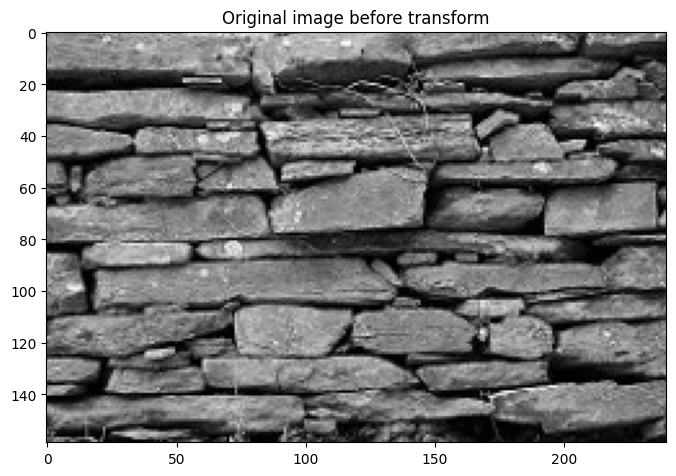

In [7]:
plt.imshow(im, cmap='gray')
plt.title('Original image before transform')
plt.show()

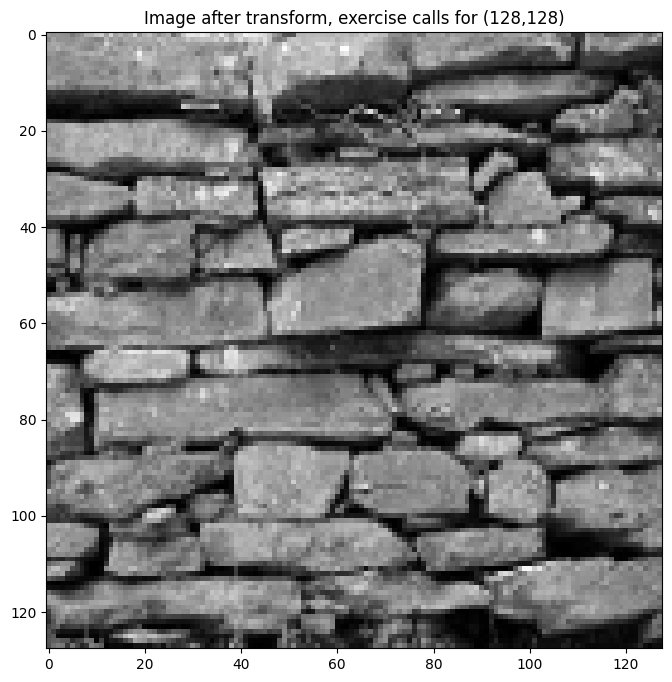

In [8]:
plt.imshow(imt, cmap='gray')
plt.title('Image after transform, exercise calls for (128,128)')
plt.show()

In [9]:
# Result placeholder
result = np.zeros((imt.shape[0] // 2, imt.shape[1] // 2))

# Pooling operation
for ii in range(result.shape[0]):       # For row in (128, 128)
    for jj in range(result.shape[1]):   # For column in (128, 128)
        result[ii, jj] = np.max(        # Append _ to (128, 128)
            imt[ii * 2:ii * 2 + 2,
                jj * 2:jj * 2 + 2]
        )


<span style='color:#7393B3'>NOTE:</span>  Let's break down how the subset in the `np.max()` function is working in the context of the given code snippet:

```python
np.max(imt[ii * 2:ii * 2 + 2, jj * 2:jj * 2 + 2])
```

In this code, the `np.max()` function is applied to a subset of the `imt` array. The goal is to calculate the maximum value within a 2x2 region of the `imt` array. Let's break down the slicing and indexing step by step:

1. `ii * 2:ii * 2 + 2`:
   - `ii` is the row index from the outer loop (ranging from 0 to 128).
   - `ii * 2` calculates the starting row index for the 2x2 region.
   - `ii * 2 + 2` calculates the ending row index for the 2x2 region, making sure it includes two rows.
   - So, this part of the slicing selects a range of two consecutive rows in the `imt` array.

2. `jj * 2:jj * 2 + 2`:
   - `jj` is the column index from the inner loop (ranging from 0 to 128).
   - `jj * 2` calculates the starting column index for the 2x2 region.
   - `jj * 2 + 2` calculates the ending column index for the 2x2 region, making sure it includes two columns.
   - This part of the slicing selects a range of two consecutive columns in the `imt` array.

Putting it all together, `imt[ii * 2:ii * 2 + 2, jj * 2:jj * 2 + 2]` selects a 2x2 subarray from the `imt` array, where the starting row and column indices are determined by the loop indices `ii` and `jj`. This subarray corresponds to the 2x2 region of the image that is currently being considered in the pooling operation.

Finally, the `np.max()` function is applied to this 2x2 subarray to calculate the maximum value within that region. The result is assigned to the corresponding position in the `result` array, as explained in the previous response. This process repeats for all positions in the `result` array, effectively downsampling the image while retaining the maximum values in each 2x2 region.

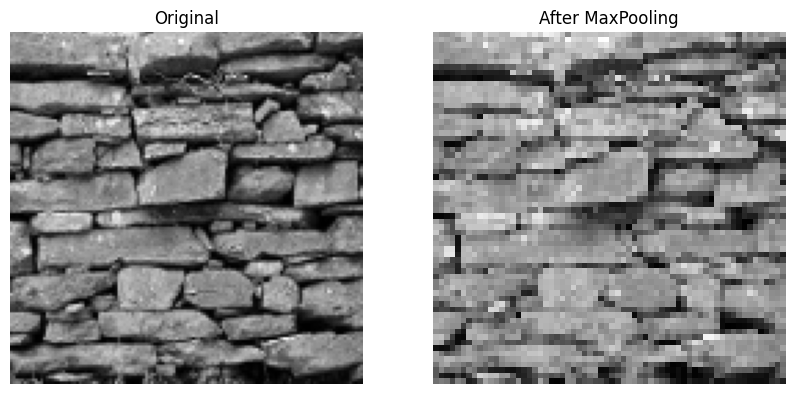

In [10]:
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8))
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

plot_comparison(imt, result, 'After MaxPooling')

The resulting image is smaller, but retains the salient features in every location

### Keras pooling layers
  
Keras implements a pooling operation as a layer that can be added to CNNs between other layers. In this exercise, you will construct a convolutional neural network similar to the one you have constructed before:
  
**Convolution => Convolution => Flatten => Dense**
  
However, you will also add a pooling layer. The architecture will add a single max-pooling layer between the convolutional layer and the dense layer with a pooling of 2x2:
  
**Convolution => Max pooling => Convolution => Flatten => Dense**
  
A Sequential model along with `Dense`, `Conv2D`, `Flatten`, and `MaxPool2D` objects are available in your workspace.
  
1. Add an input convolutional layer (15 units, `kernel_size=` of 2, `'relu'` `activation=`).
2. Add a maximum pooling operation (pooling over windows of size 2x2).
3. Add another convolution layer (5 units, `kernel_size=` of 2, `'relu'` `activation=`).
4. Flatten the output of the second convolution and add a `Dense` layer for output (3 categories, `'softmax'` `activation=`).

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Image shape
img_rows, img_cols = 28, 28

# Instantiation
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(img_rows, img_cols, 1)))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(5, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 27, 27, 15)        75        
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 15)        0         
 D)                                                              
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 5)         305       
                                                                 
 flatten_2 (Flatten)         (None, 720)               0         
                                                                 
 dense_2 (Dense)             (None, 3)                 2163      
                                                                 
Total params: 2543 (9.93 KB)
Trainable params: 2543 (9.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


This model is even deeper, but has fewer parameters.

### Train a deep CNN with pooling to classify images
  
Training a CNN with pooling layers is very similar to training of the deep networks that y have seen before. Once the network is constructed (as you did in the previous exercise), the model needs to be appropriately compiled, and then training data needs to be provided, together with the other arguments that control the fitting procedure.
  
The following model from the previous exercise is available in your workspace:
  
**Convolution => Max pooling => Convolution => Flatten => Dense**
  
1. Compile this model to use the `'categorical_crossentropy'` `loss=` function and the `'adam'` `optimizer=`.
2. Train the model for 3 `epochs=` with `batch_size=` 10.
3. Use 20% of the data as validation data (split).
4. Evaluate the model on `test_data` with `test_labels` (also batches of size 10).

In [12]:
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

train_data = train_data[(train_labels >= 0) & (train_labels < 3)][0:50].reshape(-1, 28, 28, 1)
train_labels = train_labels[(train_labels >= 0) & (train_labels < 3)][0:50]
train_labels = pd.get_dummies(train_labels).to_numpy()

test_data = test_data[(test_labels >= 0) & (test_labels < 3)][0:10].reshape(-1, 28, 28, 1)
test_labels = test_labels[(test_labels >= 0) & (test_labels < 3)][0:10]
test_labels = pd.get_dummies(test_labels).to_numpy()

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit to training data
model.fit(x=train_data, y=train_labels, epochs=3, batch_size=10, validation_split=0.2)

# Evaluate on test data 
model.evaluate(x=test_data, y=test_labels, batch_size=10)

Epoch 1/3
4/4 [==============================] - 2s 157ms/step - loss: 19.9304 - accuracy: 0.3000 - val_loss: 3.9757 - val_accuracy: 0.7000
Epoch 2/3
4/4 [==============================] - 0s 79ms/step - loss: 8.1884 - accuracy: 0.5000 - val_loss: 1.4577 - val_accuracy: 0.9000
Epoch 3/3
1/1 [==============================] - 0s 52ms/step - loss: 1.5549 - accuracy: 0.8000


[1.5548572540283203, 0.800000011920929]

This model is also very accurate!